**Mean Filter**

The mean filter is used to blur an image in order to remove noise. It involves determining the mean of the pixel values within a n x n kernel. The pixel intensity of the center element is then replaced by the mean. This eliminates some of the noise in the image and smooths the edges of the image. The blur function from the Open-CV library can be used to apply a mean filter to an image.

In [1]:

from google.colab import files
uploaded = files.upload()

Saving sample.jpg to sample.jpg


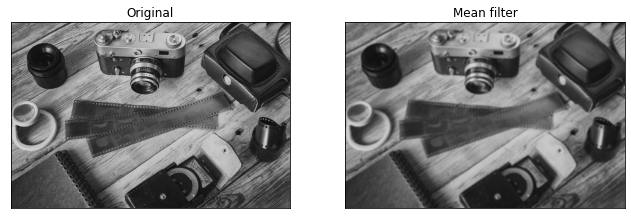

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('sample.jpg') # reads the image
#image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

Peak signal-to-noise ratio (PSNR) is the ratio between the maximum possible power of an image and the power of corrupting noise that affects the quality of its representation. To estimate the PSNR of an image, it is necessary to compare that image to an ideal clean image with the maximum possible power.

RMSE is the root mean squared error.

Here, we have an original image and it’s filtered version, let’s see the PSNR value for the image.

In [5]:

from google.colab import files
uploaded = files.upload()

Saving Original.png to Original.png


In [4]:

from google.colab import files
uploaded = files.upload()

Saving Mean Filter.png to Mean Filter.png


In [6]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(Original, Mean_Filter):
	mse = np.mean((Original - Mean_Filter) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	Original = cv2.imread("Original.png")
	Mean_Filter = cv2.imread("Mean Filter.png", 1)
	value = PSNR(Original, Mean_Filter)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()


PSNR value is 32.00820749180814 dB


PSNR is most commonly used to estimate the efficiency of compressors, filters, etc. The larger the value of PSNR, the more efficient is a corresponding compression or filter method.